# Assignment 6


In [0]:
# Assignment 6
# Run this network.  (Links to an external site.) After training the network, whatever accuracy you get is your base accuracy. Epochs = 100
# Fix the network above:
# remove dense
# add layers required to reach RF
# fix kernel scaleup and down (1x1)
# see if all dropouts are properly placed
# follow the guidelines we discussed in the class (
# Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same',"
# Save File as Assignment 6A
# Rewrite it again using these convolutions in the order given below:
# Normal Convolution
# Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
# Depthwise Separable Convolution
# Grouped Convolution (use 3x3, 5x5 only)
# Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 
# You must use all of the 5 above at least once
# Train this new model for 50 epochs. 
# Save File as Assignment 6B
# Total Score of 600. 400 for Code (300+100), and 200 for documentation (100+100)
# Upload the github folder link which has both the files. 
 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment6')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Importing Necessary Libraries

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


## Downloading cifar data with 10 Classes

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


## List the classe names and display the classes in the form of gallery


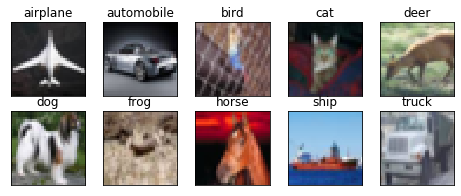

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

## Function to plot the graph for epoch Vs Accuracy and epoch Vs Loss
- this step is perfromed to understand the trend of the Accuracy and loss through out the training

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

## Calculate the Accuracy
- (enteries that are predicted correctly/ total entries used for Prediction) gives the accuracy score

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

## Normalizing the data by dividing the train and test values by 255

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Definining the Model


In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':





Epoch 1/100





390/390 [==============================] - 31s 81ms/step - loss: 1.8522 - acc: 0.2869 - val_loss: 1.4823 - val_acc: 0.4613
Epoch 2/100
390/390 [==============================] - 21s 53ms/step - loss: 1.3460 - acc: 0.5103 - val_loss: 1.1044 - val_acc: 0.6094
Epoch 3/100
390/390 [==============================] - 21s 53ms/step - loss: 1.1359 - acc: 0.5990 - val_loss: 0.9644 - val_acc: 0.6599
Epoch 4/100
390/390 [==============================] - 21s 54ms/step - loss: 0.9874 - acc: 0.6513 - val_loss: 0.8680 - val_acc: 0.7008
Epoch 5/100
390/390 [==============================] - 21s 55ms/step - loss: 0.8952 - acc: 0.6892 - val_loss: 0.9136 - val_acc: 0.6836
Epoch 6/100
390/390 [==============================] - 21s 54ms/step - loss: 0.8160 - acc: 0.7175 - val_loss: 0.7394 - val_acc: 0.7453
Epoch 7/100
390/390 [==============================] - 21s 53ms/step - loss: 0.7639 - acc: 0.7354 - val_loss: 0.7147 - val_acc: 0.7516
Epoch 8/100
390/390 [==========================

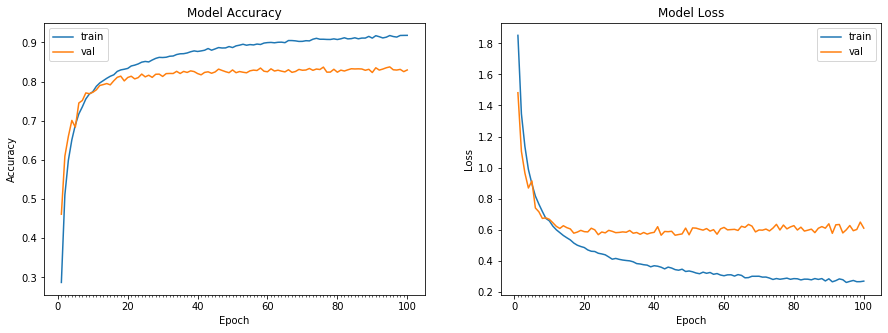

Accuracy on test data is: 82.96


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.save_weights('assignment6_1.h5')

### Base accuracy with Epochs = 100  is 0.8296

#### Problem Description : 
## Fix the network above
#### remove dense
#### fix kernel scaleup and down (1x1)
#### see if all dropouts are properly placed
#### follow the guidelines we discussed in the class (
#### Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same',"

## Approach followed to improve the accuracy more than base accuracy in less than 100 epochs. 
### Based Accuracy is 0.8296. The below model has received 0.8306 at 52nd epoch. The following has been used to achieve more than base accuracy.


- Used BatchNormalization
- Remove Dropouts after Maxpooling
- Removed Dense layers

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


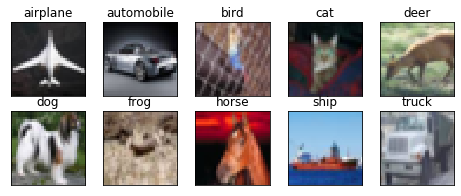

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment6')

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils


from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))


class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()


def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)


train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)




In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 2, 2))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))
# # Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_69 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_70 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 15, 15, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2))`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 27s 69ms/step - loss: 2.1875 - acc: 0.1556 - val_loss: 2.1362 - val_acc: 0.1628
Epoch 2/100
390/390 [==============================] - 25s 64ms/step - loss: 2.0389 - acc: 0.2135 - val_loss: 2.1438 - val_acc: 0.2546
Epoch 3/100
390/390 [==============================] - 25s 64ms/step - loss: 1.5697 - acc: 0.4262 - val_loss: 1.4264 - val_acc: 0.5185
Epoch 4/100
390/390 [==============================] - 25s 64ms/step - loss: 1.0511 - acc: 0.6347 - val_loss: 1.3746 - val_acc: 0.5653
Epoch 5/100
390/390 [==============================] - 25s 64ms/step - loss: 0.8395 - acc: 0.7072 - val_loss: 1.1551 - val_acc: 0.6176
Epoch 6/100
390/390 [==============================] - 25s 64ms/step - loss: 0.7485 - acc: 0.7351 - val_loss: 1.2743 - val_acc: 0.6017
Epoch 7/100
390/390 [==============================] - 25s 64ms/step - loss: 0.6848 - acc: 0.7552 - val_loss: 0.9557 - val_acc: 0.6730
Epoch 8/100
390/390 [==============================] - 

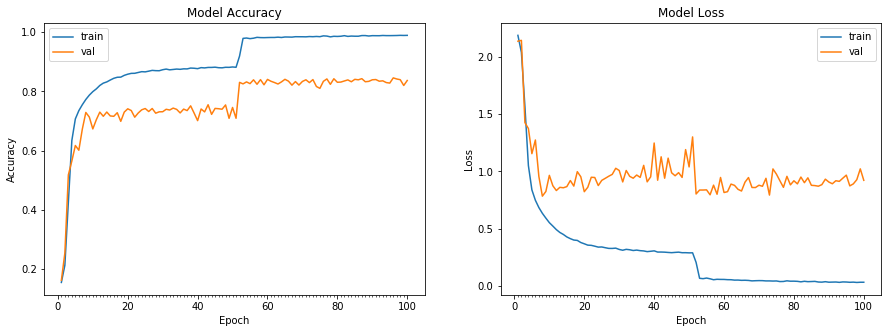

Accuracy on test data is: 83.69


In [0]:
#Training
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


#### Completed Original code

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

# import os
# os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment6')

# from keras import backend as K
# import time
# import matplotlib.pyplot as plt
# import numpy as np
# % matplotlib inline
# np.random.seed(2017) 
# from keras.models import Sequential
# from keras.layers.convolutional import Convolution2D, MaxPooling2D
# from keras.layers import Activation, Flatten, Dense, Dropout
# from keras.layers.normalization import BatchNormalization
# from keras.utils import np_utils


# from keras.datasets import cifar10
# (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
# num_train, img_channels, img_rows, img_cols =  train_features.shape
# num_test, _, _, _ =  test_features.shape
# num_classes = len(np.unique(train_labels))


# class_names = ['airplane','automobile','bird','cat','deer',
#                'dog','frog','horse','ship','truck']
# fig = plt.figure(figsize=(8,3))
# for i in range(num_classes):
#     ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
#     idx = np.where(train_labels[:]==i)[0]
#     features_idx = train_features[idx,::]
#     img_num = np.random.randint(features_idx.shape[0])
#     im = features_idx[img_num]
#     ax.set_title(class_names[i])
#     plt.imshow(im)
# plt.show()


# def plot_model_history(model_history):
#     fig, axs = plt.subplots(1,2,figsize=(15,5))
#     # summarize history for accuracy
#     axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
#     axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
#     axs[0].set_title('Model Accuracy')
#     axs[0].set_ylabel('Accuracy')
#     axs[0].set_xlabel('Epoch')
#     axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
#     axs[0].legend(['train', 'val'], loc='best')
#     # summarize history for loss
#     axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
#     axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
#     axs[1].set_title('Model Loss')
#     axs[1].set_ylabel('Loss')
#     axs[1].set_xlabel('Epoch')
#     axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
#     axs[1].legend(['train', 'val'], loc='best')
#     plt.show()


# def accuracy(test_x, test_y, model):
#     result = model.predict(test_x)
#     predicted_class = np.argmax(result, axis=1)
#     true_class = np.argmax(test_y, axis=1)
#     num_correct = np.sum(predicted_class == true_class) 
#     accuracy = float(num_correct)/result.shape[0]
#     return (accuracy * 100)


# train_features = train_features.astype('float32')/255
# test_features = test_features.astype('float32')/255
# # convert class labels to binary class labels
# train_labels = np_utils.to_categorical(train_labels, num_classes)
# test_labels = np_utils.to_categorical(test_labels, num_classes)


# # Define the model
# model = Sequential()
# model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
# model.add(Activation('relu'))
# model.add(Convolution2D(48, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Convolution2D(96, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(Convolution2D(96, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Convolution2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(Convolution2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))
# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# model.summary()


# #Training
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(zoom_range=0.0, 
#                              horizontal_flip=False)


# # train the model
# start = time.time()
# # Train the model
# model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                  samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
#                                  validation_data = (test_features, test_labels), verbose=1)
# end = time.time()
# print ("Model took %0.2f seconds to train"%(end - start))
# # plot model history
# plot_model_history(model_info)
# # compute test accuracy
# print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
